<img src="https://res.cloudinary.com/jerrick/image/upload/v1621060793/609f6cb9218235001cf4da9c.jpg">

# Introduction

The Quora Question Pairs dataset, featured in a Kaggle competition, comprises question pairs labeled as duplicates (1) or non-duplicates (0). Released by Quora, this large dataset challenges machine learning models to accurately discern duplicate questions. With tens of thousands of question pairs in the training set, the competition aimed to minimize log loss. The dataset's practical application lies in enhancing user experience by automating the identification of duplicate questions, streamlining information retrieval on the Quora platform. This dataset has spurred advancements in natural language processing and machine learning, attracting global participation and fostering innovation in duplicate question detection.

# **1 import Necessary Library**

In [140]:
import numpy as np 
import pandas as pd 
import os

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# **2 import Dataset**

In [142]:
df=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')

# 3 **Data Analysis**

In [143]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [144]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404350,404350,789800,789801,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [145]:
df['is_duplicate'].value_counts()

is_duplicate
0    255045
1    149306
Name: count, dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [147]:
df.describe

<bound method NDFrame.describe of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404346  How many keywords are there in the Racket prog...   
404347          Do you believe there is life after death?   
404348  

In [148]:
df.shape

(404351, 6)

# **4 Data cleaning and Preprocessing:**

In [149]:
new_df=df.sample(3000,random_state=2)

In [150]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [151]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

is_duplicate
0    1889
1    1111
Name: count, dtype: int64
is_duplicate
0    62.966667
1    37.033333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

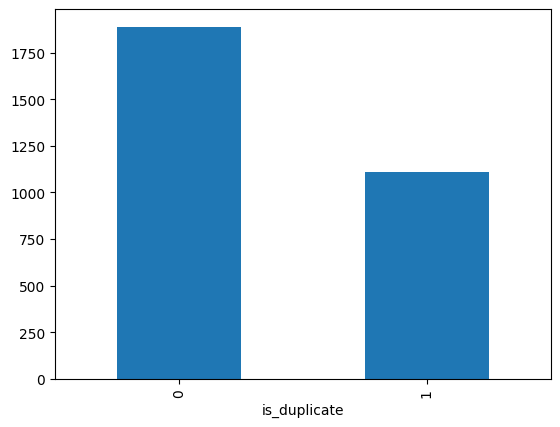

In [152]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [153]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 5998
Number of questions getting repeated 2


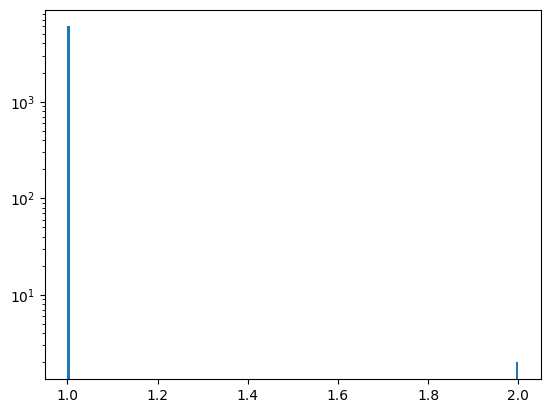

In [154]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# **5 Feature Extraction**

In [155]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [156]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [157]:
def common_words(row):
    q1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    q2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(q1 & q2)

In [158]:
new_df['common_words']=new_df.apply(common_words,axis=1)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [159]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [160]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [161]:
new_df['word_share']=round(new_df['common_words']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


<a id="4"></a>

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">5| Data visualisation 📊 📉
    
</div>

# EDA (Exploratory Data Analysis)

minimum characters 12
maximum characters 281
average num of characters 60


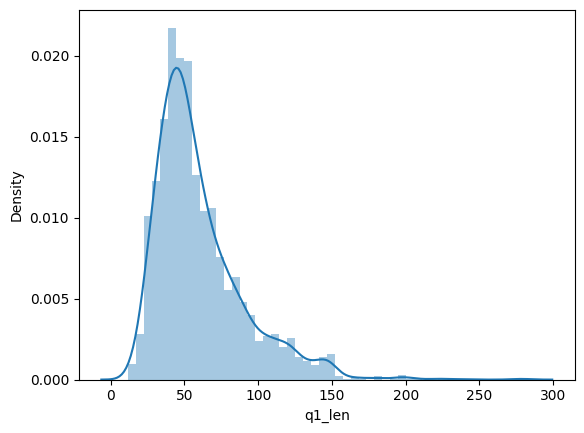

In [162]:
sns.distplot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

In [163]:
import warnings
warnings.filterwarnings('ignore')

minimum characters 12
maximum characters 340
average num of characters 60


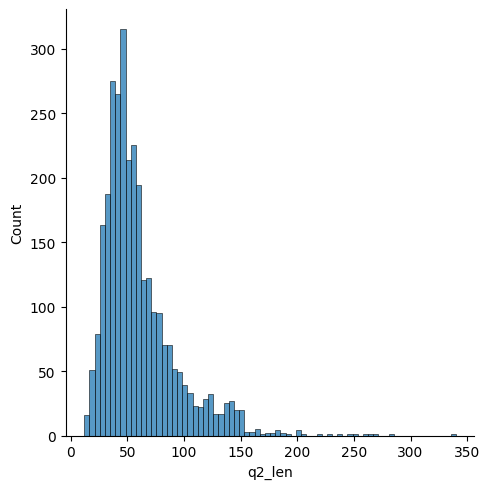

In [164]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 2
maximum words 50
average num of words 11


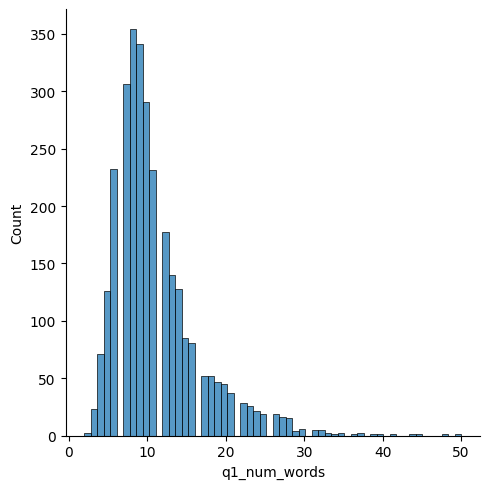

In [165]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 68
average num of words 11


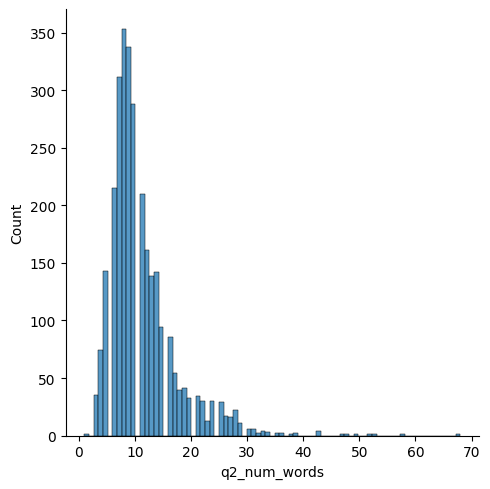

In [166]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

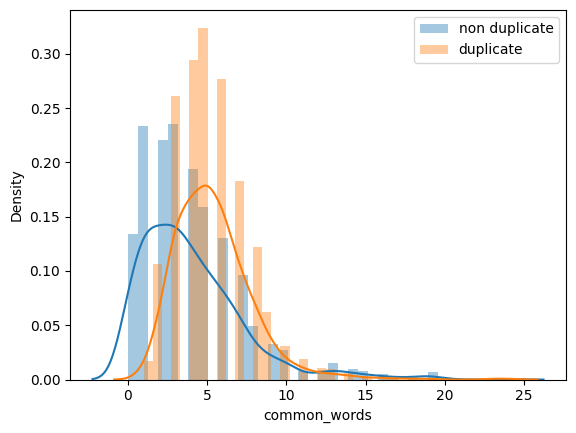

In [167]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

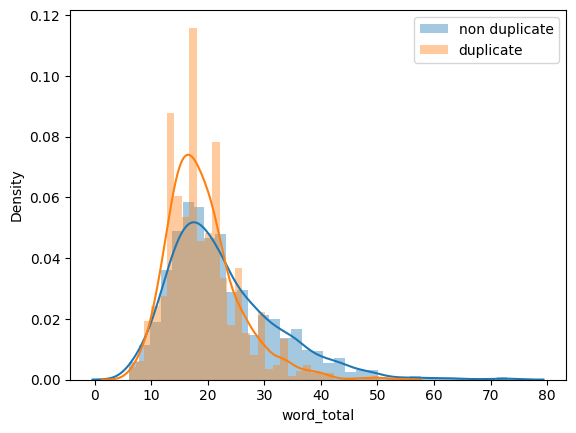

In [168]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

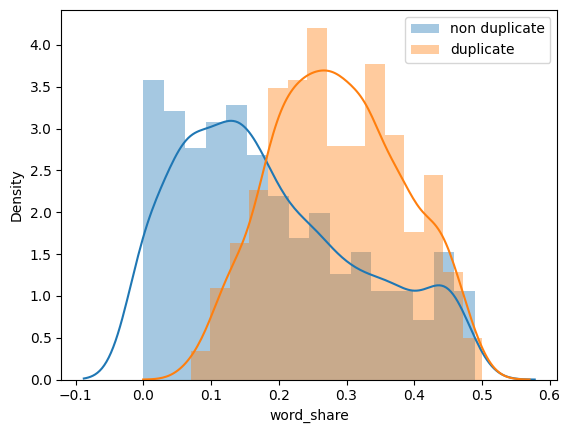

In [169]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [170]:
Que_df=new_df[['question1','question2']]
Que_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [171]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [172]:
from sklearn.feature_extraction.text import CountVectorizer

Questions = list(Que_df['question1']) + list(Que_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(Questions).toarray(),2)

In [173]:
temp1=pd.DataFrame(q1_arr,index=Que_df.index)
temp2=pd.DataFrame(q2_arr,index=Que_df.index)

temp=pd.concat([temp1,temp2],axis=1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
final_df=pd.concat([final_df,temp],axis=1)
print(final_df.shape)
final_df.head()

(3000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">6 | Split the Dataset

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.25,random_state=42)

In [177]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 6007), (750, 6007), (2250,), (750,))

<div style='background-color: #ffe7f6; border: 2px solid; padding :5px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="#FF0094" ><b>⚙ Machine Learning Algorithm</b></font>
</div>

# Algorithm 🔄

# **1. KNN 🔄**

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [179]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [180]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
train_predictions = knn_classifier.predict(X_train)

train_accuracy1 = accuracy_score(y_train, train_predictions)

In [182]:
test_predictions = knn_classifier.predict(X_test)

test_accuracy1 = accuracy_score(y_test, test_predictions)

In [183]:
print(f"Training Accuracy: {train_accuracy1}")
print(f"Testing Accuracy: {test_accuracy1}")

Training Accuracy: 0.8275555555555556
Testing Accuracy: 0.6506666666666666


# **(2) Naive Bayes classifier 🔄**

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [185]:
# GaussianNB

In [186]:
G_classifier = GaussianNB()

In [187]:
G_classifier.fit(X_train, y_train)

GaussianNB()

In [188]:
train_predictions = G_classifier.predict(X_train)

train_accuracy21 = accuracy_score(y_train, train_predictions)

In [189]:
test_predictions = G_classifier.predict(X_test)

test_accuracy21 = accuracy_score(y_test, test_predictions)

In [190]:
print(f"Training Accuracy: {train_accuracy21}")
print(f"Testing Accuracy: {test_accuracy21}")

Training Accuracy: 0.9106666666666666
Testing Accuracy: 0.624


In [191]:
# BernoulliNB

In [192]:
B_classifier = BernoulliNB()

In [193]:
B_classifier.fit(X_train, y_train)

BernoulliNB()

In [194]:
train_predictions = B_classifier.predict(X_train)

train_accuracy22 = accuracy_score(y_train, train_predictions)

In [195]:
test_predictions = G_classifier.predict(X_test)

test_accuracy22 = accuracy_score(y_test, test_predictions)

In [196]:
print(f"Training Accuracy: {train_accuracy22}")
print(f"Testing Accuracy: {test_accuracy22}")

Training Accuracy: 0.8973333333333333
Testing Accuracy: 0.624


In [197]:
# MultinomialNB

In [198]:
M_classifier = MultinomialNB()

In [199]:
M_classifier.fit(X_train, y_train)

MultinomialNB()

In [200]:
train_predictions = M_classifier.predict(X_train)

train_accuracy23 = accuracy_score(y_train, train_predictions)

In [201]:
test_predictions = M_classifier.predict(X_test)

test_accuracy23 = accuracy_score(y_test, test_predictions)

In [202]:
print(f"Training Accuracy: {train_accuracy23}")
print(f"Testing Accuracy: {test_accuracy23}")

Training Accuracy: 0.904
Testing Accuracy: 0.7106666666666667


## 👉 GaussianNB
### Training Accuracy: 0.9106666666666666
### Testing Accuracy: 0.624
## 👉 BernoulliNB
### Training Accuracy: 0.8973333333333333
### Testing Accuracy: 0.624
## 👉 MultinomialNB
### Training Accuracy: 0.904
### Testing Accuracy: 0.7106666666666667
## Being the best of them | 🔥 MultinomialNB |

# **(3) Decision Tree 🔄**

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
clf = DecisionTreeClassifier()

In [205]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [206]:
train_predictions = clf.predict(X_train)

train_accuracy3 = accuracy_score(y_train, train_predictions)

In [207]:
test_predictions = clf.predict(X_test)

test_accuracy3 = accuracy_score(y_test, test_predictions)

In [208]:
print(f"Training Accuracy: {train_accuracy3}")
print(f"Testing Accuracy: {test_accuracy3}")

Training Accuracy: 1.0
Testing Accuracy: 0.6746666666666666


# **4. RandomForest**

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [210]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [211]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [212]:
train_predictions = rf_classifier.predict(X_train)

train_accuracy4 = accuracy_score(y_train, train_predictions)

In [213]:
test_predictions = rf_classifier.predict(X_test)

test_accuracy4 = accuracy_score(y_test, test_predictions)

In [214]:
print(f"Training Accuracy: {train_accuracy4}")
print(f"Testing Accuracy: {test_accuracy4}")

Training Accuracy: 1.0
Testing Accuracy: 0.7106666666666667


# **(5) Boosting Algorithm 🔄**

In [215]:
from sklearn.ensemble import AdaBoostClassifier

In [216]:
base_classifier = DecisionTreeClassifier(max_depth=1)

In [217]:
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [218]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [219]:
train_predictions = adaboost_classifier.predict(X_train)

train_accuracy5 = accuracy_score(y_train, train_predictions)

In [220]:
test_predictions = adaboost_classifier.predict(X_test)

test_accuracy5 = accuracy_score(y_test, test_predictions)

In [221]:
print(f"Training Accuracy: {train_accuracy5}")
print(f"Testing Accuracy: {test_accuracy5}")

Training Accuracy: 0.7724444444444445
Testing Accuracy: 0.712


# **(6). Logistic Regression**

In [222]:
from sklearn import linear_model

In [223]:
lrg = linear_model.LogisticRegression()

In [224]:
lrg.fit(X_train, y_train)

LogisticRegression()

In [225]:
train_predictions = lrg.predict(X_train)

train_accuracy7 = accuracy_score(y_train, train_predictions)

In [226]:
test_predictions = lrg.predict(X_test)

test_accuracy7 = accuracy_score(y_test, test_predictions)

In [227]:
print(f"Training Accuracy: {train_accuracy7}")
print(f"Testing Accuracy: {test_accuracy7}")

Training Accuracy: 0.8391111111111111
Testing Accuracy: 0.7066666666666667


# **(7).Linear Regression**

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [229]:
model = LinearRegression()

In [230]:
model.fit(X_train, y_train)

LinearRegression()

In [231]:
train_predictions = clf.predict(X_train)

train_accuracy8 = accuracy_score(y_train, train_predictions)

In [232]:
test_predictions = clf.predict(X_test)

test_accuracy8 = accuracy_score(y_test, test_predictions)

In [233]:
print(f"Training Accuracy: {train_accuracy8}")
print(f"Testing Accuracy: {test_accuracy8}")

Training Accuracy: 1.0
Testing Accuracy: 0.6746666666666666


# **(9).Gradient Boosting Machines (GBM)**

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [236]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [237]:
train_predictions = model.predict(X_train)

train_accuracy9 = accuracy_score(y_train, train_predictions)

In [238]:
test_predictions = model.predict(X_test)

test_accuracy9 = accuracy_score(y_test, test_predictions)

In [239]:
print(f"Training Accuracy: {train_accuracy9}")
print(f"Testing Accuracy: {test_accuracy9}")

Training Accuracy: 0.816
Testing Accuracy: 0.7


# **Random Forest Algorithm is the best accuracy**
# (Random Forest)

### Training Accuracy: 1.0
### Testing Accuracy: 0.7106666666666667

## **mean accuracy = 0.85**

# <img src="https://static.vecteezy.com/system/resources/previews/011/297/600/non_2x/promotion-number-85-percent-3d-png.png">

## **<div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">10 | Hierarchical Clustering </div>**

In [240]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [244]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df.iloc[:,1:].values)

In [245]:
linkage_matrix = linkage(X_scaled, method='ward')

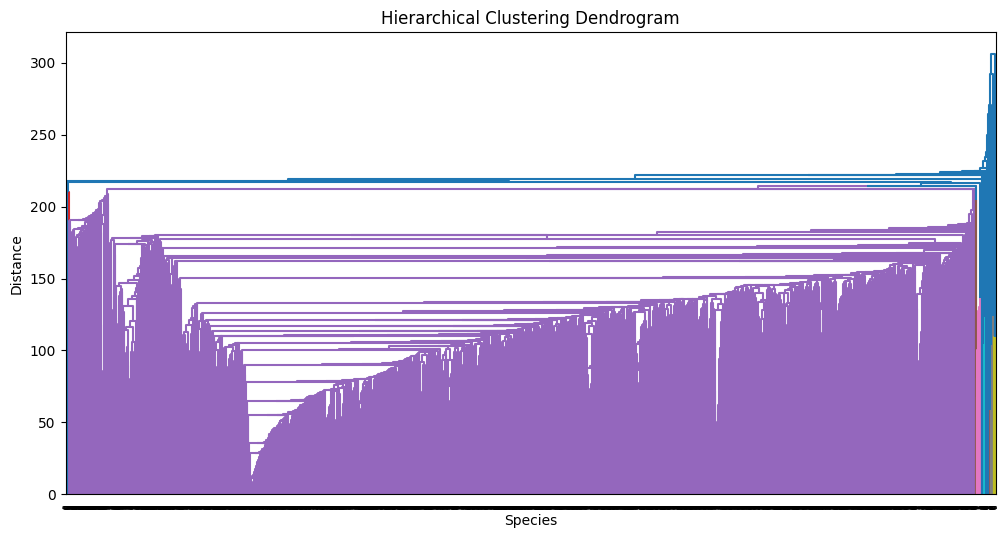

In [246]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=final_df['is_duplicate'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()